# Lecture 12: Working with tabular data using `R` and `tidyverse`

[Rasi Subramaniam](http://rasilab.org/)

Nov 9, 2021

To interactively work with the code below, open [lecture12.ipynb](./lecture12.ipynb) in VSCode. Make sure to select the `kernel` for `R` so that you can execute `R` code. You should have already set this up following the software installation instructions [here](../../software/README.md).

`R` is the second programming language after `Python` that we will learn in this course. We will use `R` over the next 5 lectures.

`R` is particularly well suited for reading, manipulating, and visualizing data in tabular and biological sequence formats. 
Many statistical tests are also available out of the box in `R`.

While "base" `R` is used widely, I almost exclusively use `R` for its two excellent package collections:

1. [Tidyverse](https://www.tidyverse.org/) - suited for tabular data
2. [Bioconductor](https://www.bioconductor.org/) - suited for biology-aware analyses

Today we will learn a few basic functions from `tidyverse` for working with tabular data.

Unlike `pandas` which is a single package with lot of functionality, `tidyverse` is a collection of packages that are focused on specific tasks.

1. [ggplot2](https://ggplot2.tidyverse.org/) - for plotting data
2. [dplyr](https://dplyr.tidyverse.org/) - for filtering, aggregating, and transforming data
3. [readr](https://readr.tidyverse.org/) - for reading and writing data
4. [tidyr](https://tidyr.tidyverse.org/) - for cleaning and transforming data
5. [stringr](https://stringr.tidyverse.org/) - for manipulating strings
6. [purrr](https://purrr.tidyverse.org/) - for manipulating lists of R objects
7. [forcats](https://forcats.tidyverse.org/) - for manipulating categorical data

You can load all the above packages in one go:

In [18]:
library(tidyverse)

## Reading data

Various options for reading and writing data are in package [`readr`](https://readr.tidyverse.org/).

In [19]:
data <- read_tsv("data/example_dataset_1.tsv")

data

Rows: 16 Columns: 7

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (3): strain, insert_sequence, kozak_region
dbl (4): mean_yfp, mean_rfp, mean_ratio, se_ratio


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



strain,mean_yfp,mean_rfp,mean_ratio,se_ratio,insert_sequence,kozak_region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
schp688,1748,20754,0.755,0.066,10<U+00D7>AGA,A
schp684,3294,20585,1.437,0.021,10<U+00D7>AGA,B
schp690,3535,20593,1.541,0.018,10<U+00D7>AGA,C
schp687,4658,20860,2.004,0.021,10<U+00D7>AGA,D
schp686,5000,21171,2.121,0.023,10<U+00D7>AGA,E
schp685,7379,22956,2.893,0.050,10<U+00D7>AGA,F
schp683,9365,23866,3.522,0.110,10<U+00D7>AGA,G
schp689,8693,22649,3.424,0.125,10<U+00D7>AGA,H
schp679,2528,19906,1.149,0.056,10<U+00D7>AAG,A


The tabular data structure is called a `tibble` in `tidyverse`, and is a souped-up version of the [data.frame](https://en.wikipedia.org/wiki/Data_frame) R data structure with additional nice features.

The ` <- ` assignment operator is equivalent to the ` = ` assignment operator and can be used interchangeably. However, using the ` <- ` operator is more conventional.

## Plotting data

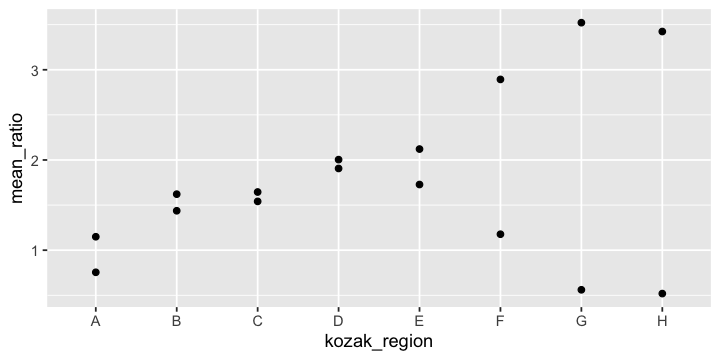

In [20]:
ggplot(data, aes(x = kozak_region, y = mean_ratio)) +
  geom_point()


**Anatomy of a `ggplot2` plot**

 - Begins with `ggplot` function with a `tibble` argument as the first argument.
 - `aes` specifies the variables to plot.
 - `geom` specifies the type of plot.
 - `+` adds additional `layers` to the plot.


**Key differences with `Python`**
  - No need to specify variables within quotes.
  - Indentation convention is different.

## Change size of plot globally

In [21]:
options(repr.plot.width = 5, repr.plot.height = 3)

## How do we show multiple experimental variables?


Plotting a point graph with color

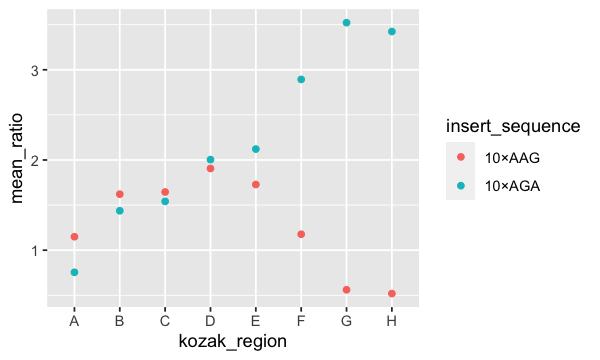

In [22]:
ggplot(data, aes(x = kozak_region,
                 y = mean_ratio,
                 color = insert_sequence)) +
  geom_point()

Plotting a line graph

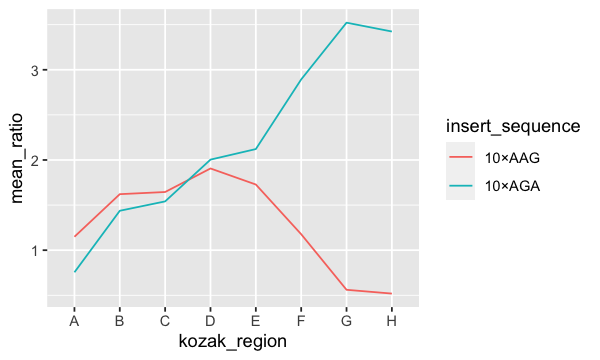

In [23]:
ggplot(data, aes(x = kozak_region,
                 y = mean_ratio,
                 color = insert_sequence,
                 group = insert_sequence)) +
  geom_line()

Plotting point and line graphs

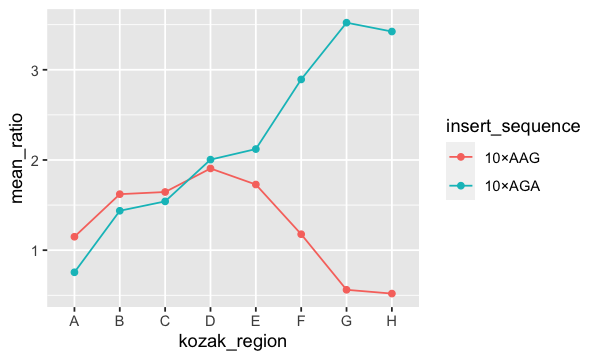

In [24]:
ggplot(data, aes(x = kozak_region,
                 y = mean_ratio,
                 color = insert_sequence,
                 group = insert_sequence)) +
  geom_line() +
  geom_point()

## ‘Faceting’ – Plotting in multiple panels

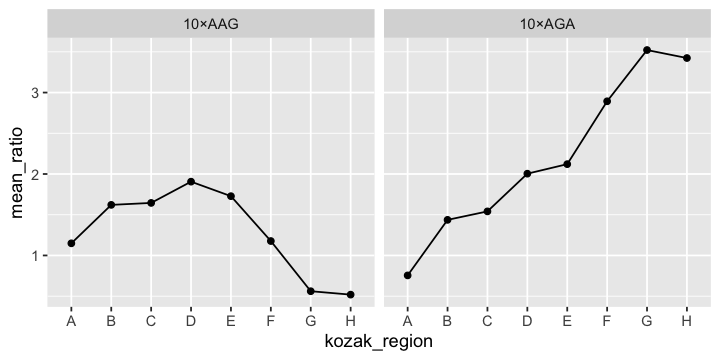

In [25]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(data, aes(x = kozak_region,
                 y = mean_ratio,
                 group = insert_sequence)) +
  geom_line() +
  geom_point() +
  facet_grid(~ insert_sequence)

# In-class `ggplot2` exercises

(20 min)

## 1. Make X, Y, legend labels into nice strings

See https://ggplot2.tidyverse.org/reference/labs.html

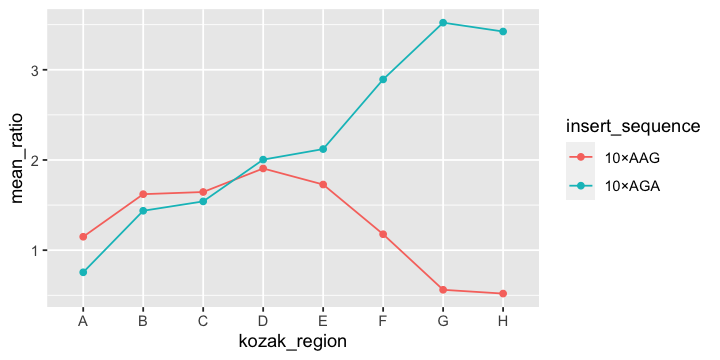

In [26]:
ggplot(data, aes(x = kozak_region,
                 y = mean_ratio,
                 color = insert_sequence,
                 group = insert_sequence)) +
  geom_line() +
  geom_point()

## 2. Add title to the above plot

## 3. Change the plot look to a `classic` theme

See https://ggplot2.tidyverse.org/reference/ggtheme.html

## 4. Change Y axis to log scale

See https://ggplot2.tidyverse.org/reference/scale_continuous.html

## 5. Change Y scale to go linearly from 0 to 5

# Transforming data

Uses functions from the [`dplyr`](https://dplyr.tidyverse.org/) package.

In [27]:
data <- read_tsv("data/example_dataset_1.tsv")


data

Rows: 16 Columns: 7

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (3): strain, insert_sequence, kozak_region
dbl (4): mean_yfp, mean_rfp, mean_ratio, se_ratio


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



strain,mean_yfp,mean_rfp,mean_ratio,se_ratio,insert_sequence,kozak_region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
schp688,1748,20754,0.755,0.066,10<U+00D7>AGA,A
schp684,3294,20585,1.437,0.021,10<U+00D7>AGA,B
schp690,3535,20593,1.541,0.018,10<U+00D7>AGA,C
schp687,4658,20860,2.004,0.021,10<U+00D7>AGA,D
schp686,5000,21171,2.121,0.023,10<U+00D7>AGA,E
schp685,7379,22956,2.893,0.050,10<U+00D7>AGA,F
schp683,9365,23866,3.522,0.110,10<U+00D7>AGA,G
schp689,8693,22649,3.424,0.125,10<U+00D7>AGA,H
schp679,2528,19906,1.149,0.056,10<U+00D7>AAG,A


## Select specific columns

In [28]:
select(data, strain, mean_ratio, insert_sequence, kozak_region)

strain,mean_ratio,insert_sequence,kozak_region
<chr>,<dbl>,<chr>,<chr>
schp688,0.755,10<U+00D7>AGA,A
schp684,1.437,10<U+00D7>AGA,B
schp690,1.541,10<U+00D7>AGA,C
schp687,2.004,10<U+00D7>AGA,D
schp686,2.121,10<U+00D7>AGA,E
schp685,2.893,10<U+00D7>AGA,F
schp683,3.522,10<U+00D7>AGA,G
schp689,3.424,10<U+00D7>AGA,H
schp679,1.149,10<U+00D7>AAG,A


## Combine operations using the ` %>% ` operator

In [29]:
data <- read_tsv("data/example_dataset_1.tsv") %>% 
  select(strain, mean_ratio, insert_sequence, kozak_region)

Rows: 16 Columns: 7

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (3): strain, insert_sequence, kozak_region
dbl (4): mean_yfp, mean_rfp, mean_ratio, se_ratio


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Above is the same as the following:

In [30]:
data <- read_tsv("data/example_dataset_1.tsv") %>% 
  select(., strain, mean_ratio, insert_sequence, kozak_region)

Rows: 16 Columns: 7

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (3): strain, insert_sequence, kozak_region
dbl (4): mean_yfp, mean_rfp, mean_ratio, se_ratio


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



The `%>%` operator lets you `chain` different data analysis tasks together and makes the analysis logic easier to understand.

Side note: You can create keyboard shortcuts for ` <- ` and ` %>% ` in VSCode as explained [here](https://code.visualstudio.com/docs/getstarted/keybindings). 

I use `Alt + -` for ` <- ` and `Alt + Shift + m` for ` %>% ` following `RStudio` convention.

You can get a view of the transformed data using `print()` as the last step in a chain of commands

In [31]:
data <- read_tsv("data/example_dataset_1.tsv") %>% 
  select(strain, mean_ratio, insert_sequence, kozak_region) %>% 
  print()

Rows: 16 Columns: 7

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (3): strain, insert_sequence, kozak_region
dbl (4): mean_yfp, mean_rfp, mean_ratio, se_ratio


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 16 x 4
   strain  mean_ratio insert_sequence kozak_region
   <chr>        <dbl> <chr>           <chr>       
 1 schp688      0.755 "10\u00d7AGA"   A           
 2 schp684      1.44  "10\u00d7AGA"   B           
 3 schp690      1.54  "10\u00d7AGA"   C           
 4 schp687      2.00  "10\u00d7AGA"   D           
 5 schp686      2.12  "10\u00d7AGA"   E           
 6 schp685      2.89  "10\u00d7AGA"   F           
 7 schp683      3.52  "10\u00d7AGA"   G           
 8 schp689      3.42  "10\u00d7AGA"   H           
 9 schp679      1.15  "10\u00d7AAG"   A           
10 schp675      1.62  "10\u00d7AAG"   B           
11 schp681      1.64  "10\u00d7AAG"   C           
12 schp678      1.91  "10\u00d7AAG"   D           
13 schp677      1.73  "10\u00d7AAG"   E           
14 schp676      1.18  "10\u00d7AAG"   F           
15 schp674      0.561 "10\u00d7AAG"   G           
16 schp680      0.519 "10\u00d7AAG"   H           


## Filter rows

In [32]:
data <- read_tsv("data/example_dataset_1.tsv")

Rows: 16 Columns: 7

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (3): strain, insert_sequence, kozak_region
dbl (4): mean_yfp, mean_rfp, mean_ratio, se_ratio


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [33]:
data %>% 
  filter(kozak_region == "A")

strain,mean_yfp,mean_rfp,mean_ratio,se_ratio,insert_sequence,kozak_region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
schp688,1748,20754,0.755,0.066,10<U+00D7>AGA,A
schp679,2528,19906,1.149,0.056,10<U+00D7>AAG,A


In [34]:
data %>%
  filter(kozak_region == "A", insert_sequence == "10×AGA")

strain,mean_yfp,mean_rfp,mean_ratio,se_ratio,insert_sequence,kozak_region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>


In [35]:
data %>%
  filter(kozak_region == "A") %>% 
  filter(insert_sequence == "10×AGA")

strain,mean_yfp,mean_rfp,mean_ratio,se_ratio,insert_sequence,kozak_region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>


## Arrange (sort) rows in a specific order

In [36]:
data %>%
  arrange(mean_ratio)

strain,mean_yfp,mean_rfp,mean_ratio,se_ratio,insert_sequence,kozak_region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
schp680,1117,19377,0.519,0.010,10<U+00D7>AAG,H
schp674,1270,20316,0.561,0.004,10<U+00D7>AAG,G
schp688,1748,20754,0.755,0.066,10<U+00D7>AGA,A
schp679,2528,19906,1.149,0.056,10<U+00D7>AAG,A
schp676,2657,20223,1.177,0.048,10<U+00D7>AAG,F
schp684,3294,20585,1.437,0.021,10<U+00D7>AGA,B
schp690,3535,20593,1.541,0.018,10<U+00D7>AGA,C
schp675,3687,20438,1.621,0.036,10<U+00D7>AAG,B
schp681,3705,20227,1.645,0.021,10<U+00D7>AAG,C


## Create new columns using `mutate`

In [40]:
data <- read_tsv("data/example_dataset_2.tsv") %>% 
  print()

Rows: 16 Columns: 3

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (1): strain
dbl (2): mean_yfp, mean_rfp


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 16 x 3
   strain  mean_yfp mean_rfp
   <chr>      <dbl>    <dbl>
 1 schp688     1748    20754
 2 schp684     3294    20585
 3 schp690     3535    20593
 4 schp687     4658    20860
 5 schp686     5000    21171
 6 schp685     7379    22956
 7 schp683     9365    23866
 8 schp689     8693    22649
 9 schp679     2528    19906
10 schp675     3687    20438
11 schp681     3705    20227
12 schp678     4378    20630
13 schp677     3967    20604
14 schp676     2657    20223
15 schp674     1270    20316
16 schp680     1117    19377


In [41]:
data <- data %>%
  mutate(mean_ratio = mean_yfp / mean_rfp) %>%
  print()

# A tibble: 16 x 4
   strain  mean_yfp mean_rfp mean_ratio
   <chr>      <dbl>    <dbl>      <dbl>
 1 schp688     1748    20754     0.0842
 2 schp684     3294    20585     0.160 
 3 schp690     3535    20593     0.172 
 4 schp687     4658    20860     0.223 
 5 schp686     5000    21171     0.236 
 6 schp685     7379    22956     0.321 
 7 schp683     9365    23866     0.392 
 8 schp689     8693    22649     0.384 
 9 schp679     2528    19906     0.127 
10 schp675     3687    20438     0.180 
11 schp681     3705    20227     0.183 
12 schp678     4378    20630     0.212 
13 schp677     3967    20604     0.193 
14 schp676     2657    20223     0.131 
15 schp674     1270    20316     0.0625
16 schp680     1117    19377     0.0576


Use mutate to modify existing columns

In [42]:
data %>%
  mutate(mean_ratio = round(mean_ratio, 2))

strain,mean_yfp,mean_rfp,mean_ratio
<chr>,<dbl>,<dbl>,<dbl>
schp688,1748,20754,0.08
schp684,3294,20585,0.16
schp690,3535,20593,0.17
schp687,4658,20860,0.22
schp686,5000,21171,0.24
schp685,7379,22956,0.32
schp683,9365,23866,0.39
schp689,8693,22649,0.38
schp679,2528,19906,0.13


## Combine tables using `join` functions

Variants: `inner_join`, `left_join`, `right_join`, `full_join`

See [https://dplyr.tidyverse.org/reference/mutate-joins.html](https://dplyr.tidyverse.org/reference/mutate-joins.html)

In [43]:
annotations <- read_tsv("data/example_dataset_3.tsv")

annotations

Rows: 17 Columns: 3

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (3): strain, insert_sequence, kozak_region


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



strain,insert_sequence,kozak_region
<chr>,<chr>,<chr>
schp674,10<U+00D7>AAG,G
schp675,10<U+00D7>AAG,B
schp676,10<U+00D7>AAG,F
schp677,10<U+00D7>AAG,E
schp678,10<U+00D7>AAG,D
schp679,10<U+00D7>AAG,A
schp680,10<U+00D7>AAG,H
schp681,10<U+00D7>AAG,C
schp683,10<U+00D7>AGA,G


In [44]:
data %>% 
  inner_join(annotations, by = "strain")

strain,mean_yfp,mean_rfp,mean_ratio,insert_sequence,kozak_region
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
schp688,1748,20754,0.08422473,10<U+00D7>AGA,A
schp684,3294,20585,0.16001943,10<U+00D7>AGA,B
schp690,3535,20593,0.17166027,10<U+00D7>AGA,C
schp687,4658,20860,0.22329818,10<U+00D7>AGA,D
schp686,5000,21171,0.23617212,10<U+00D7>AGA,E
schp685,7379,22956,0.32144102,10<U+00D7>AGA,F
schp683,9365,23866,0.39239923,10<U+00D7>AGA,G
schp689,8693,22649,0.38381385,10<U+00D7>AGA,H
schp679,2528,19906,0.12699689,10<U+00D7>AAG,A


In [ ]:
data %>% 
  left_join(annotations, by = "strain")

In [ ]:
data %>% 
  right_join(annotations, by = "strain")

## You can combine `dplyr` and `ggplot2` functions

But remember to use ` %>% ` in `dplyr` vs ` +` in `ggplot2`!

In [7]:
data %>% 
  mutate(mean_ratio = mean_yfp / mean_rfp) %>%
  left_join(annotations, by = "strain") %>%
  ggplot(aes(x = kozak_region, y = mean_ratio, 
             color = insert_sequence, group = insert_sequence)) +
  geom_line() +
  geom_point()

ERROR: Error in is.data.frame(y): object 'annotations' not found


## Use `stringr` functions to manipulate string columns

All functions are named nicely and begin with `str_`. I find them easier to use than the equivalent `Python` regular expression functions.

See [https://stringr.tidyverse.org/reference/index.html](https://stringr.tidyverse.org/reference/index.html)

In [ ]:
data %>% 
  mutate(mean_ratio = mean_yfp / mean_rfp) %>%
  left_join(annotations, by = "strain") %>% 
  mutate(codon = str_extract(insert_sequence, "[A-Z]{3}$"))

# In-class data transformation exercises

(20 min)

## 1. Create log2-transformed YFP/RFP ratio as a new column

Google for `log2 R` to find the appropriate function

In [ ]:
data <- read_tsv("data/example_dataset_2.tsv")

## 2. Extract strain number from the `strain` column into a new column and sort numerically by strain number

Extract the strain number using a `stringr` function.

Google for `character to integer R` to find appropriate function to use in `mutate`.

Then sort.

In [ ]:
annotations <- read_tsv("data/example_dataset_3.tsv")

annotations

## 3. Plot with the X axis as `kozak_region` but sorted by strain number

This requires a bit more reading and discussion, but it is a good example of how to learn new `tidyverse` functions on your own!

Use [fct_reorder](https://forcats.tidyverse.org/reference/fct_reorder.html) function from the [`forcats`](https://forcats.tidyverse.org/reference/index.html) package to sort `kozak_region` by strain number you created above in a `mutate` step and then feed it into `ggplot`.

In [ ]:
data %>% 
  mutate(mean_ratio = mean_yfp / mean_rfp) %>%
  left_join(annotations, by = "strain") %>%
  ggplot(aes(x = kozak_region, y = mean_ratio, 
             color = insert_sequence, group = insert_sequence)) +
  geom_line() +
  geom_point()

# Grouping, summarizing, and reshaping data

## Use `summarize` to calculate stats across rows

In [ ]:
data <- read_tsv("data/example_dataset_2.tsv")

In [4]:
data %>%
  summarize(max_yfp = max(mean_yfp),
            max_rfp = max(mean_rfp)) %>%
  print()

# A tibble: 1 x 2
  max_yfp max_rfp
    <dbl>   <dbl>
1    9365   23866


## Other examples of summary functions:

- min()	
- mean()
- sd()	
- dplyr::first()	
- dplyr::n()

## Use `group_by` to group rows by one or more columns

In [12]:
data <- read_tsv("data/example_dataset_4.tsv") %>% 
  print()

Rows: 74 Columns: 4

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (1): strain
dbl (3): yfp, rfp, replicate


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 74 x 4
   strain    yfp   rfp replicate
   <chr>   <dbl> <dbl>     <dbl>
 1 schp677  4123 20661         1
 2 schp678  4550 21437         1
 3 schp675  3880 21323         1
 4 schp676  2863 20668         1
 5 schp687  4767 20995         1
 6 schp688  1274 20927         1
 7 schp679  2605 20840         1
 8 schp680  1175 20902         1
 9 schp681  3861 20659         1
10 schp683  9949 25406         1
# ... with 64 more rows


In [13]:
data %>% 
  group_by(strain) %>%
  print()

# A tibble: 74 x 4
# Groups:   strain [16]
   strain    yfp   rfp replicate
   <chr>   <dbl> <dbl>     <dbl>
 1 schp677  4123 20661         1
 2 schp678  4550 21437         1
 3 schp675  3880 21323         1
 4 schp676  2863 20668         1
 5 schp687  4767 20995         1
 6 schp688  1274 20927         1
 7 schp679  2605 20840         1
 8 schp680  1175 20902         1
 9 schp681  3861 20659         1
10 schp683  9949 25406         1
# ... with 64 more rows


## Use `group_by` + `summarize` for statistics by group

In [14]:
data %>% 
  group_by(strain) %>%
  summarize(mean_yfp = mean(yfp), mean_rfp = mean(rfp)) %>%
  print()

# A tibble: 16 x 3
   strain  mean_yfp mean_rfp
   <chr>      <dbl>    <dbl>
 1 schp674    1270    20316 
 2 schp675    3687.   20438.
 3 schp676    2656.   20223.
 4 schp677    3967.   20604 
 5 schp678    4378.   20630.
 6 schp679    2528    19906 
 7 schp680    1117.   19377.
 8 schp681    3705    20227 
 9 schp683    9364.   23866.
10 schp684    3294.   20585.
11 schp685    7379    22956 
12 schp686    5000.   21171.
13 schp687    4658.   20860.
14 schp688    1748.   20755.
15 schp689    8693.   22650.
16 schp690    3535.   20594.


In [10]:
data %>% 
  group_by(strain) %>%
  summarize(mean_yfp = mean(yfp), mean_rfp = mean(rfp),
            se_yfp = sd(yfp) / sqrt(n()), 
            se_rfp = sd(rfp) / sqrt(n())) %>%
  print()

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 16 x 5
   strain  mean_yfp mean_rfp se_yfp se_rfp
   <chr>      <dbl>    <dbl>  <dbl>  <dbl>
 1 schp674    1270    20316    54     717 
 2 schp675    3687.   20438.   84.6   483.
 3 schp676    2656.   20223.  137.    380.
 4 schp677    3967.   20604   107.    423.
 5 schp678    4378.   20630.  111.    575.
 6 schp679    2528    19906    33.9  1034.
 7 schp680    1117.   19377.   27.7   700.
 8 schp681    3705    20227    90.8   469.
 9 schp683    9364.   23866.  352.    515.
10 schp684    3294.   20585.   49.6   318.
11 schp685    7379    22956   194.    973.
12 schp686    5000.   21171.   81.5   307.
13 schp687    4658.   20860.   80.9   199.
14 schp688    1748.   20755.  160.    203.
15 schp689    8693.   22650.  667.   1045.
16 schp690    3535.   20594.   31.0   173.


## `%>%` enables complex yet easily understandable data analysis pipelines

In [ ]:
annotations <- read_tsv("data/example_dataset_3.tsv")

annotations

In [13]:
data %>% 
  group_by(strain) %>%
  summarize(mean_yfp = mean(yfp), mean_rfp = mean(rfp)) %>%
  mutate(mean_ratio = mean_yfp / mean_rfp) %>%
  left_join(annotations, by = "strain") %>%
  print()

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 16 x 6
   strain  mean_yfp mean_rfp mean_ratio insert_sequence kozak_region
   <chr>      <dbl>    <dbl>      <dbl> <chr>           <chr>       
 1 schp674    1270    20316      0.0625 10×AAG          G           
 2 schp675    3687.   20438.     0.180  10×AAG          B           
 3 schp676    2656.   20223.     0.131  10×AAG          F           
 4 schp677    3967.   20604      0.193  10×AAG          E           
 5 schp678    4378.   20630.     0.212  10×AAG          D           
 6 schp679    2528    19906      0.127  10×AAG          A           
 7 schp680    1117.   19377.     0.0577 10×AAG          H           
 8 schp681    3705    20227      0.183  10×AAG          C           
 9 schp683    9364.   23866.     0.392  10×AGA          G           
10 schp684    3294.   20585.     0.160  10×AGA          B           
11 schp685    7379    22956      0.321  10×AGA          F           
12 schp686    5000.   21171.     0.236  10×AGA          E           
13 schp687    4

## %>% and + if you want to plot


`summarise()` ungrouping output (override with `.groups` argument)



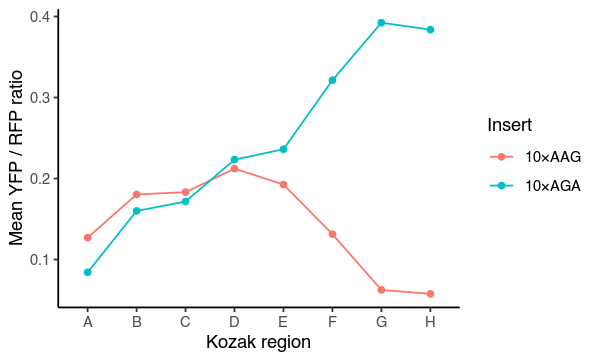

In [19]:
options(repr.plot.width = 5, repr.plot.height = 3)

data %>% 
  group_by(strain) %>%
  summarize(mean_yfp = mean(yfp), mean_rfp = mean(rfp)) %>%
  mutate(mean_ratio = mean_yfp / mean_rfp) %>%
  left_join(annotations, by = "strain") %>%
  ggplot(aes(x = kozak_region, y = mean_ratio, 
             color = insert_sequence, group = insert_sequence)) +
  geom_line() + 
  geom_point() +
  theme_classic() +
  labs(x = "Kozak region", y = "Mean YFP / RFP ratio", color = "Insert")

## Re-shape data using `pivot_longer` and `pivot_wider`

In [38]:
data <- read_tsv("data/example_dataset_4.tsv") %>% 
  print()


── Column specification ────────────────────────────────────────────────────────
cols(
  strain = col_character(),
  yfp = col_double(),
  rfp = col_double(),
  replicate = col_double()
)




# A tibble: 74 x 4
   strain    yfp   rfp replicate
   <chr>   <dbl> <dbl>     <dbl>
 1 schp677  4123 20661         1
 2 schp678  4550 21437         1
 3 schp675  3880 21323         1
 4 schp676  2863 20668         1
 5 schp687  4767 20995         1
 6 schp688  1274 20927         1
 7 schp679  2605 20840         1
 8 schp680  1175 20902         1
 9 schp681  3861 20659         1
10 schp683  9949 25406         1
# … with 64 more rows


How do you plot a histogram of both `yfp` and `rfp` as separate panels?

In [15]:
data %>%
  pivot_longer(c("yfp", "rfp"), names_to = "channel", values_to = "value") %>%
  print()

# A tibble: 148 x 4
   strain  replicate channel value
   <chr>       <dbl> <chr>   <dbl>
 1 schp677         1 yfp      4123
 2 schp677         1 rfp     20661
 3 schp678         1 yfp      4550
 4 schp678         1 rfp     21437
 5 schp675         1 yfp      3880
 6 schp675         1 rfp     21323
 7 schp676         1 yfp      2863
 8 schp676         1 rfp     20668
 9 schp687         1 yfp      4767
10 schp687         1 rfp     20995
# ... with 138 more rows


In [16]:
data %>%
  pivot_longer(c("yfp", "rfp"), names_to = "channel", values_to = "value") %>%
  pivot_wider(names_from = "channel", values_from = "value") %>%
  print()

# A tibble: 74 x 4
   strain  replicate   yfp   rfp
   <chr>       <dbl> <dbl> <dbl>
 1 schp677         1  4123 20661
 2 schp678         1  4550 21437
 3 schp675         1  3880 21323
 4 schp676         1  2863 20668
 5 schp687         1  4767 20995
 6 schp688         1  1274 20927
 7 schp679         1  2605 20840
 8 schp680         1  1175 20902
 9 schp681         1  3861 20659
10 schp683         1  9949 25406
# ... with 64 more rows


`pivot_longer` is useful for handling distinct measurements without listing them explicitly.

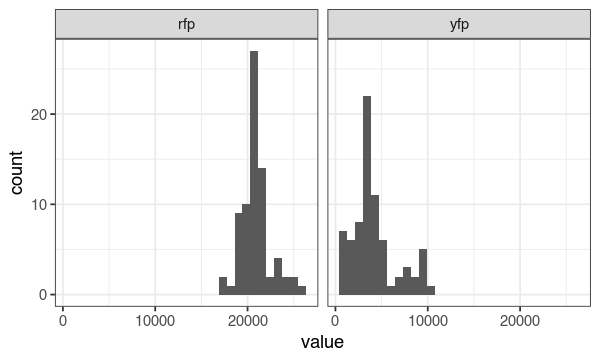

In [27]:
plot_data <- data %>%
  pivot_longer(c("yfp", "rfp"), names_to = "channel", values_to = "value")

plot_data %>%
  ggplot(aes(x = value)) +
  facet_wrap(~ channel) +
  geom_histogram(bins = 30) +
  theme_bw()


## Use `purrr::map` and `purrr::unnest` to read and work with tables from many files

We use `list.files` and `enframe` to go from a list of files to a `tibble` quickly. Also check out `deframe`.

In [ ]:
data <- list.files("data/channel_data/", full.names = T) %>%
  enframe("number", "file") %>%
  mutate(data = map(file, read_tsv)) %>%
  unnest(data) %>%
  mutate(channel = str_extract(file, "[^/]+(?=.tsv)")) %>%
  select(-number, -file) %>%
  print()

# In-class exercises

(20 min)

## 1. Re-shape data read above from two separate files to create columns for `yfp` and `rfp`

## 2. Calculate ratio of YFP to RFP

## 3. Calculate the `mean` and `standard error` of the ratio between replicates

## 4. Combine data with annotations